# Detección de anomalías: Dataset sintético

## ¿Qué vamos a hacer?
- Crear un dataset sintético para detección de anomalías con casos normales y anómalos.
- Modelizar una distribución gaussiana sobre los datos normales.
- Determinar el umbral de probabilidad para detectar los datos anómalos por validación.
- Evaluar la precisión final del modelo sobre el subconjunto de test.
- Representar gráficamente el comportamiento del modelo en cada paso.

In [1]:
# TODO: Usa esta celda para importar todas las librerías necesarias

import numpy as np
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from matplotlib.colors import from_levels_and_colors
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

plot_n = 1
rng = np.random.RandomState(42)

## Crear un dataset sintético para detección de anomalías

Para resolver este ejercicio, primero necesitamos crear un dataset con datos normales y otro con datos anómalos. En este caso, los datasets serán de 2 dimensiones (2D) con 2 características únicamente, en lugar de un nº de características *n* elevado, para facilitar su visualización en una representación 2D.

Inicialmente, vamos a crear 2 datasets independientes, uno que representará los datos normales y otro los datos anómalos. Luego combinaremos dichos datasets en 3 subsets finales, de entrenamiento, validación y test, como habitualmente, con la particularidad de que en este caso los datos anómalos sólo se encontrarán en los subsets de validación y test.

Completa la siguiente celda de código para crear los datasets iniciales independientes con datos normales y anómalos:

Nº de ejemplos: 300, ratio de ejemplos anómalos: 15.0%, nº de datos normales y anómalos: 255/45
Nº de características: 2


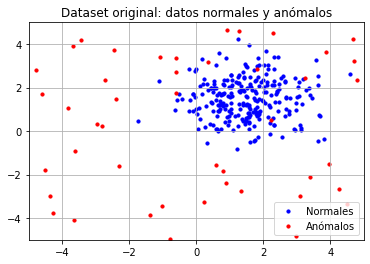

In [2]:
# TODO: Genera dos datasets sintéticos independientes con datos normales y anómalos

m = 300
n = 2
ratio_anomalos = 0.15    # Porcentaje de datos anómalos vs datos normales, modificable
m_anomalos = int(m * ratio_anomalos)
m_normales = m - m_anomalos
x_lim = (-5, 5)
y_lim = (-5, 5)

print('Nº de ejemplos: {}, ratio de ejemplos anómalos: {}%, nº de datos normales y anómalos: {}/{}'.format(m, ratio_anomalos * 100, m_normales, m_anomalos))
print('Nº de características: {}'.format(n))

# Creamos ambos datasets
dataset_normales = make_blobs(n_samples=m_normales, centers=np.array([[1.5, 1.5]]), cluster_std=1.0, random_state=42)
dataset_normales = dataset_normales[0]    # Descartamos el resto de información y retenemos sólo las posiciones de los ejemplos
dataset_anomalos = np.random.uniform(low=(x_lim[0], y_lim[0]), high=(x_lim[1], y_lim[1]), size=(m_anomalos, 2))

# Representamos los datos iniciales
plt.figure(plot_n)

plt.title('Dataset original: datos normales y anómalos')

plt.scatter(dataset_normales[:, 0], dataset_normales[:, 1], s=10, color='b')
plt.scatter(dataset_anomalos[:, 0], dataset_anomalos[:, 1], s=10, color='r')

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.legend(('Normales', 'Anómalos'))
plt.grid()

plt.show()

plot_n += 1

Antes de continuar, vamos a preprocesar los datos normalizándolos, como hacemos habitualmente. Dada que nuestra *X* se compondrá de ambos datasets, los normalizaremos al a vez.

En este caso, no insertamos una primera columna de 1s al dataset, por lo que normalizamos todas las columnas.

Completa la siguiente celda de código para normalizar los datos. Para ello, rescata tu función de normalización de ejercicios anteriores:

In [3]:
# TODO: Normaliza los datos de ambos datasets con los mismos parámetros de normalización

def normalize(x, mu, std):
    """ Normaliza un dataset con ejemplos X
    
    Argumentos posicionales:
    x -- array 2D de Numpy con los ejemplos, sin término de bias
    mu -- vector 1D de Numpy con la media de cada característica/columna
    std -- vector 1D de Numpy con la desviación típica de cada característica/columna
    
    Devuelve:
    x_norm -- array 2D de Numpy con los ejemplos, con sus características normalizadas
    """
    return [...]

# Halla la media y la desviación típica de las características de los datasets originales
# Concatena antes ambos datasets en una X común, asegurándote de utilizar el eje correcto
X = [...]
mu_normalizar = [...]
std = [...]

print('Datasets originales:')
print(dataset_normales.shape, dataset_anomalos.shape)

print('Media y desviación típica de las características:')
print(mu_normalizar)
print(mu_normalizar.shape)
print(std)
print(std.shape)

print('Datasets normalizados:')
dataset_normales_norm = normalize(dataset_normales, mu_normalizar, std)
dataset_anomalos_norm = normalize(dataset_anomalos, mu_normalizar, std)

print(dataset_normales_norm.shape)
print(dataset_anomalos_norm.shape)

Datasets originales:
(255, 2) (45, 2)
Media y desviación típica de las características:
[Ellipsis]


AttributeError: 'list' object has no attribute 'shape'

Ahora vamos a subdividir los datasets originales en los subsets de entrenamiento, validación y test.

Para ello, dividimos el dataset de datos normales según los ratios habituales, y asignamos la mitad de datos anómalos a los subsets de validación y test. Si tuviéramos un nº de datos anómalos demasiado pequeño, podríamos incorporar una validación cruzada por K-fold.

Completa la siguiente celda de código para crear dichos subsets:

In [ ]:
# TODO: Divide los datasets en los subsets de entrenamiento, validación y test con los datos normales y anómalos divididos entre los 2 últimos

ratios = [66,33,33]
print('Ratios:\n', ratios, ratios[0] + ratios[1] + ratios[2])

r = [0,0]
# Consejo: la función round() y el atributo x.shape pueden serte útiles
r[0] = [...]
r[1] = [...]
print('Índices de corte:\n', r)

# Divide el dataset de datos normales en los 3 subsets siguiendo los ratios indicados
# Consejo: la función np.array_split() puede serte útil
X_train, X_cv, X_test = [...]

# Asigna la etiqueta de Y = 0 a todos los datos provenientes del dataset de datos normales
# Denotaremos los datos anómalos como Y = 1
# Crea arrays 1D de la longitud del nº de ejemplos de cada subset con el valor de 0. (float) en cada elemento
Y_train = [...]
Y_cv = [...]
Y_test = [...]

# Ahora concatena la mitad de los datos anómalos al subset de validación y la otra mitad al subset de test
# Consejo: de nuevo, la función np.array_split() puede serte útil
dataset_anomalos_cv, dataset_anomalos_test = [...]

X_cv = [...]
X_test = [...]
# El resultado final para X_cv y X_test serán vectores 2D de (m_normales * ratio[CV o test] + m_anomalos / 2, n)

# Por último, al igual que hemos hecho antes, concatena a Y_cv e Y_test sendos arrays 1D con la longitud del nº de ejemplos anómalos en cada subset (la mitad de m_anomalos)
# Cada array, en esta ocasión, tiene valores de 1. (float) en cada elemento
Y_cv = [...]
Y_test = [...]
# El resultado final para Y_cv y Y_test serán vectores 1D de (m_normales * ratio[CV o test], 1) de 0s y (m_anomalos / 2, 1) de 1s.

# Comprobamos los subsets creados
print('Tamaños de los subsets de entrenamiento, validación y test:')
print(X_train.shape)
print(Y_train.shape)
print(X_cv.shape)
print(Y_cv.shape)
print(X_test.shape)
print(Y_test.shape)

Por último, vamos a acabar de preprocesar los datasets, reordenándolos aleatoriamente.

Completa la siguiente celda de código para reordenar aleatoriamente los subsets:

In [ ]:
# TODO: Reordena aleatoriamente los subsets de entrenamiento, validación y test individualmente

print('Primeras 10 filas y 2 columnas de X y vector Y:')
print('Subset de entrenamiento:')
print(X_train[:10,:2])
print(Y_train[:10,:2])
print('Subset de validación:')
print(X_cv[:10,:2])
print(Y_cv[:10,:2])
print('Subset de test:')
print(X_test[:10,:2])
print(Y_test[:10,:2])

print('Reordenamos X e Y:')
# Si lo prefieres, puedes usar la función de conveniencia de sklearn.utils.shuffle
# Usa un estado aleatorio inicial de 42, para mantener la reproducibilidad
X_train, Y_train = [...]
X_cv, Y_cv = [...]
X_test, Y_test = [...]

print('Primeras 10 filas y 2 columnas de X y vector Y:')
print('Subset de entrenamiento:')
print(X_train[:10,:2])
print(Y_train[:10,:2])
print('Subset de validación:')
print(X_cv[:10,:2])
print(Y_cv[:10,:2])
print('Subset de test:')
print(X_test[:10,:2])
print(Y_test[:10,:2])

print('Tamaños de los subsets de entrenamiento, validación y test:')
print(X_train.shape)
print(Y_train.shape)
print(X_cv.shape)
print(Y_cv.shape)
print(X_test.shape)
print(Y_test.shape)

Por último, representamos nuestros 3 subsets en una gráfica 2D.

Completa la siguiente celda de código para representar los subsets:

In [ ]:
# TODO: Representa los 3 subsets en una gráfica 2D

# Puedes ajustar los parámetros de matplotlib, como el rango de las dimensiones y tamaño de los puntos
plt.figure(plot_n)

plt.title('Subsets con datos normales y anómalos')

cmap, norm = from_levels_and_colors([0., 0.5, 1.1], ['blue', 'red'])

plt.scatter(X_train[:, 0], X_train[:, 1], s=25, c=Y_train, marker='o', cmap=cmap, norm=norm)
plt.scatter(X_cv[:, 0], X_cv[:, 1], s=25, c=Y_cv, marker='s', cmap=cmap, norm=norm)
plt.scatter(X_test[:, 0], X_test[:, 1], s=25, c=Y_test, marker='*', cmap=cmap, norm=norm)

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.legend(('Entrenamiento', 'Validación', 'Test'))
plt.grid()

plt.show()

plot_n += 1

## Modelizar una distribución gaussiana

Vamos a "entrenar el modelo", que en este caso significará modelizar la presumible distribución gaussiana que siguen los datos normales.

Modelizamos sólo los datos normales porque queremos encontrar qué distribución siguen, qué distribución de datos es la normal o aceptable y qué datos no siguen dicha distribución y se deberían considerar anómalos.

Una distibución gaussiana multivariable viene definida por 2 parámetros: la media $\mu$ y la matriz de covarianza $\Sigma$. $\mu$ es un vector de tamaño (*n*) y $\Sigma$ un vector/matriz cuadarada (*n*, *n*).

Recuerda del módulo y ejercicio sobre SVM con filtro gaussiano que la distribución gaussiana (o normal) multivariable puede tener una forma redondeada u ovalada, que la $\mu$ representa el punto central de la distribución en el espacio y la $\Sigma$ la forma de la misma.

*NOTA*: Aunque la distribución normal o gaussiana es una de las más comunes en la naturaleza, sino la que más, en un proyecto real antes deberíamos comprobar si nuestros datos normales, según el conjunto de características tomadas de ellos, siguen una distribución normal o tenemos que modelarlos con otro tipo de distribución, siguiendo los mismos pasos.

$\mu$ y $\Sigma$ se podrían calcular como:
$$
\mu = \frac{1}{m} \sum\limits_{i=0}^{m} x^i; \\
\Sigma = \frac{1}{m} \sum\limits_{i=0}^{m} (x^i - \mu)(x^i - \mu)^T;
$$

Sigue las siguientes instrucciones para modelizar la distribución gaussiana y obtener sus parámetros $\mu$ y $\Sigma$ y así luego poder calcular la probabilidad de que un punto sea anómalo:

In [ ]:
# TODO: Modeliza la distribución gaussiana y obtén mu y Sigma

# Calcula la media y Sigma de X_train
# Para ello, puedes utilizar las funciones de Numpy de media y matriz de covarianza con el eje adecuado
mu = [...]
sigma = [...]

# Computa la distribución normal multivariable con dichos parámetros
dist_normal = multivariate_normal(mean=mu, cov=sigma)

print('Dimensiones de la media y matriz de covarianza del subset de entrenamiento:')
print(mu.shape, sigma.shape)
print('Media:')
print(mu)
print('Matriz de covarianza:')
print(sigma)

Vamos a representar gráficamente la función de densidad de la distribución de los datos normales con cortes de probabilidad junto al dataset de datos normales.

Función de densidad de probabilidad:

$pdf(x) = \frac{1}{\Sigma \sqrt{2 \pi}} e^{- \frac{1}{2}(\frac{x - \mu}{\Sigma})^2}$

Sigue las instrucciones de la siguiente celda para ello:

*NOTA*: Puedes basarte en la función [contourf](https://matplotlib.org/stable/gallery/images_contours_and_fields/contourf_demo.html#sphx-glr-gallery-images-contours-and-fields-contourf-demo-py) de matplotlib.

In [ ]:
# TODO: Representa la función de densidad y los datos normales

fig1, ax2 = plt.subplots([...])

# Añade una barra de color con la probabilidad de la distribución
[...]

# Añade un título y etiquetas a cada dimensión
[...]

# Representa también los datos del subset de entrenamiento X_train como puntos en la misma gráfica
[...]

plt.show()

## Determinar el umbral de probabilidad para detectar casos anómalos

Ahora vamos a determinar el umbral de probabilidad a partir del cual determinaremos si un nuevo caso es normal o anómalo. Si un ejemplo es demasiado diferente a los datos normales, si está alejado de ellos, si la probabilidad de que siga la misma distribución que los datos normales, es inferior a dicho umbral, podemos declararlo como anómalo.

Para encontrar dicho umbral, vamos a utilizar el subset de validación, con datos normales y anómalos, y al igual que la validación para la regularización en aprendizaje supervisado, vamos a estimar múltiples valores del umbral $\epsilon$, quedándonos con aquel que mejor clasifique datos normales y anómalos.

Para comenzar, vamos a representar gráficamente la distribución, el subset de validación y varios posibles valores de $\epsilon$.

Para ello, sigue las instrucciones para completar la siguiente celda:

*NOTA*: Para las líneas de contorno, usa la función [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contour.html#matplotlib.axes.Axes.contour), también utilizada en el ejemplo anterior.

In [5]:
# TODO: Representa la distribución, el subset de validación y varios posibles valores de epsilon

# Genera algunos valores para epsilon
epsilon_evaluado = np.linspace(0., 0.5, num=5)

# Recupera el código de la celda anterior y añádele una línea de contorno en cada valor de epsilon
[...]

array([0.   , 0.125, 0.25 , 0.375, 0.5  ])

Para tener mayor visibilidad sobre nuestro dataset y comprobar el valor de $\epsilon$ finalmente, vamos a computar las probabilidades de que cada dato anómalo del subset de validación siga la distribución de los datos normales.

Para ello, sigue las instrucciones de la siguiente celda:

In [ ]:
# TODO: Calcula las probabilidades de los datos anómalos de validación según la distribución de entrenamiento

# Filtra los datos del subset de validación que sean anómalos
# Recuerda, los datos anómalos tienen una Y_cv = 1.
X_cv_anomalos = [...]

# Calcula sus probabilidades de seguir la distribución normal
p_cv_anomalos = dist_normal.pdf(X_cv_anomalos)

print('Probabilidades de seguir la distribución normal de los 10 primeros datos de validación:')
print(p_cv_anomalos[:10])

Por último, vamos a evaluar un espacio lineal de posibles valores de $\epsilon$ y hallaremos el más óptimo para declarar un dato como anómalo:

In [ ]:
# TODO: Evalúa múltiples valores de epsilon y halla el más óptimo para clasificar datos como normales o anómalos

# Genera un espacio lineal de valores de epsilon con más precisión
epsilon_evaluado = np.linspace(0., 1., num=1e2)    # Puedes modificar la precisión para acelerar la computación

# Valores a hallar su óptimo
epsilon = 1e6    # Valor de epsilon
f1_cv = 0.    # F1_score de la clasificación
for e in epsilon_evaluado:
    # Asigna Y = 1. a valores cuya probabilidad sea inferior a epsilon y 0. al resto
    Y_cv_pred = np.where([...])
    
    # Halla el F1-score para dicha clasificación con Y_cv como valor conocido
    score = f1_score([...])
    
    if score > f1_cv:
        f1_cv = score
        epsilon = e

print('Epsilon óptima en subset de validación:', epsilon)
print('Con F1-score:', f1_cv)

## Evaluar la precisión final del modelo

Para finalizar nuestro entrenamiento, vamos a comprobar la precisión final del modelo sobre el subset de test, como hacemos habitualmente.

Para ello, haremos una comprobación matemática y visual de dichos datos.

Sigue las instrucciones para completar la siguiente celda y representar gráficamente los datos normales y anómalos del subset de test junto a la distribución de datos normales del subset de entrenamiento:

In [ ]:
# TODO: Representa el subset de test junto a la distribución de datos del subset de entrenamiento
# Incluye la línea de contorno para la epsilon escogida

[...]

plt.show()

Ahora calcula las métricas de evaluación de clasificación para evaluar la clasificación entre datos normales y anómalos que hace el modelo sobre el subset de test:

In [ ]:
# TODO: Calcula las métricas de evaluación de clasificación del modelo para el subset de test

# Asigna Y = 1. a valores cuya probabilidad sea inferior a epsilon y 0. al resto
Y_test_pred = np.where([...])

# Haya el F1-score para la clasificación con Y_test como valor conocido
f1_test = f1_score([...])

print('F1-score para el subset de test:', f1_test)

Analiza gráficamente qué datos del subset de test clasifica correcta e incorrectamente el modelo:

In [ ]:
# TODO: Representa errores y aciertos en el subset de test junto a la distribución y el corte de epsilon

# Asigna z = 1. para acierto y z = 0. para fallo
# Acierto: Y_test == Y_test_pred
z = [...]

# Representa la gráfica
# Utiliza colores diferentes para los datos que ha acertado y los que ha fallado
[...]

plt.show()

*¿Crees que el modelo hace un buen trabajo al detectar las anomalías?*

*¿Hay algún dato que tú clasificarías de forma diferente?*

Por último, representa gráficamente todos los datos, de los 3 subsets, de forma conjunta, junto a la distribución y el corte $\epsilon$, para analizar la distribución de datos normales y anómalos y el funcionamiento del modelo:

In [ ]:
# TODO: Representa los datos normales y anómalos junto a la distribución y el corte de epsilon
# Representa los 3 subsets: entrenamiento, validación y test
# Si lo prefieres, puedes distinguirlos con marcadores de formas diferentes
# Puedes utilizar colores diferentes para datos normales y anómalos conocidos originalmente
[...]

plt.show()